No data points to plot.


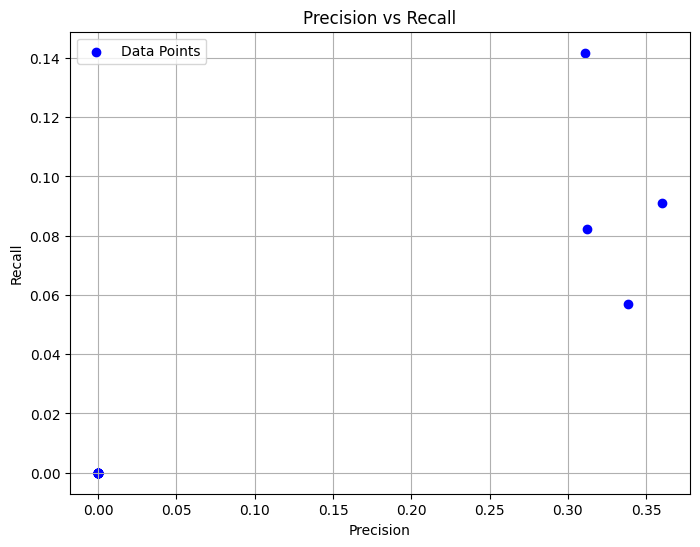

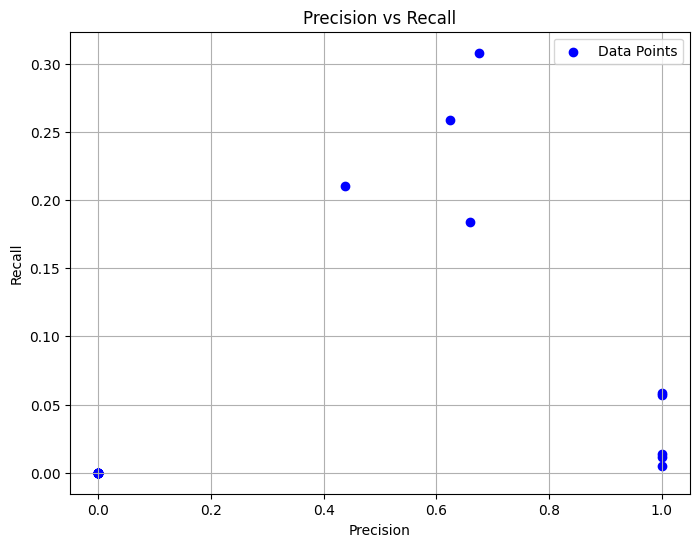

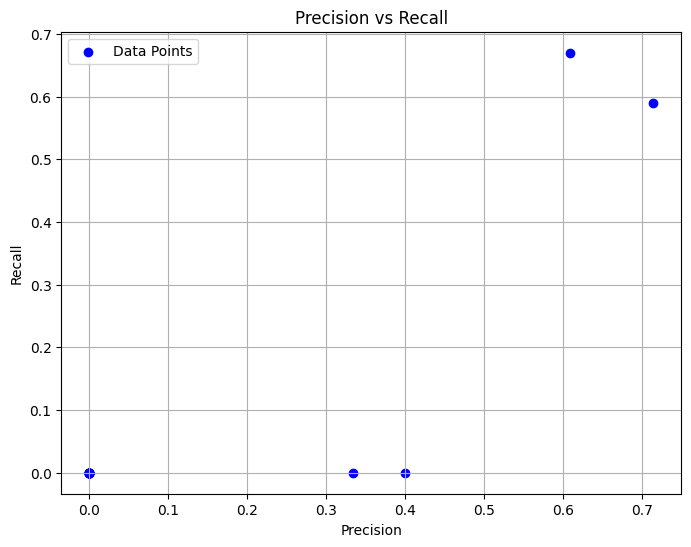

In [11]:
import json
import matplotlib.pyplot as plt

def filter_and_plot(input_file, filter):
    data_points = []  # Initialize a 2D array for storing [precision, recall]

    # Read and process the file line by line
    with open(input_file, 'r') as file:
        for line in file:
            try:
                # Parse the JSON object
                entry = json.loads(line.strip())

                # Check if "attack" is "mixed"
                if entry.get("attack") == filter:
                    # Extract "precision" and "recall"
                    precision = entry.get("precision")
                    recall = entry.get("recall")

                    # Ensure both precision and recall are valid numbers
                    if isinstance(precision, (int, float)) and isinstance(recall, (int, float)):
                        data_points.append([precision, recall])
            except json.JSONDecodeError as e:
                print(f"Invalid JSON: {e} in line: {line.strip()}")

    # Plot the data points
    if data_points:
        # Unpack the precision and recall values
        precision_values, recall_values = zip(*data_points)

        # Create the plot
        plt.figure(figsize=(8, 6))
        plt.scatter(precision_values, recall_values, c='blue', label='Data Points')
        plt.title("Precision vs Recall")
        plt.xlabel("Precision")
        plt.ylabel("Recall")
        plt.grid(True)
        plt.legend()
        plt.savefig(filter+"_diagramm.svg", format="svg")
    else:
        print("No data points to plot.")

if __name__ == "__main__":
    filter_and_plot("output.json","const_pos")
    filter_and_plot("output.json","rand_speed")
    filter_and_plot("output.json","sudden_stop")
    filter_and_plot("output.json","mix")

#To run in terminal: jupyter nbconvert --execute --to notebook plot_p_r.ipynbd

Diagram saved to const_pos_diagramm.svg
Diagram saved to rand_speed_diagramm.svg
Diagram saved to sudden_stop_diagramm.svg
Diagram saved to mixed_diagramm.svg


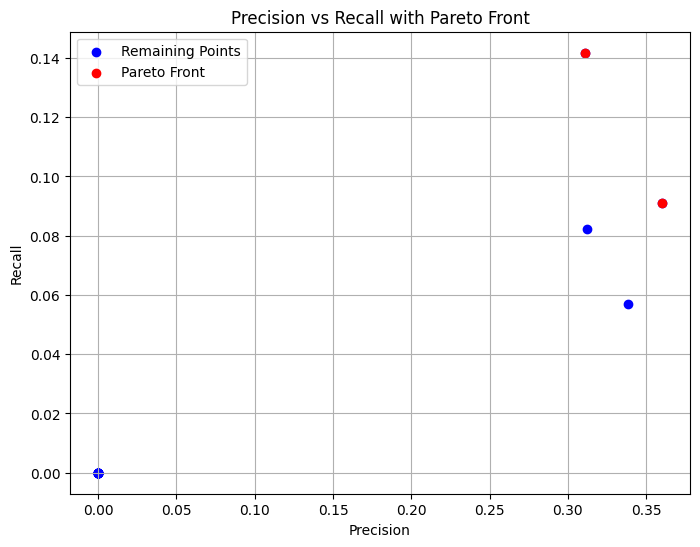

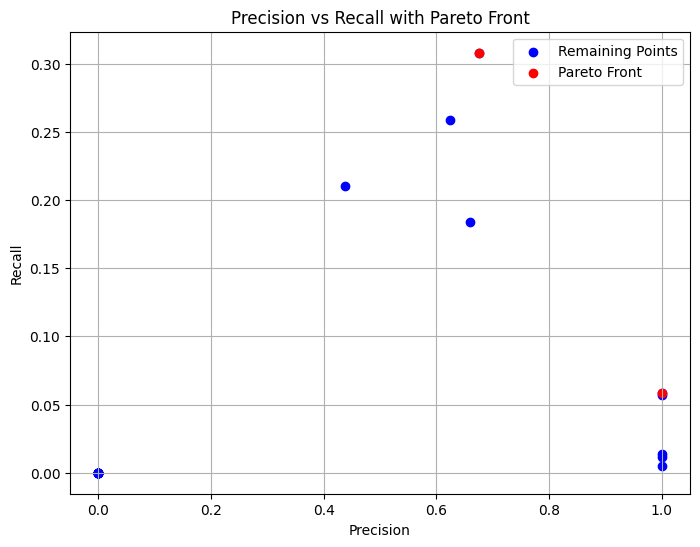

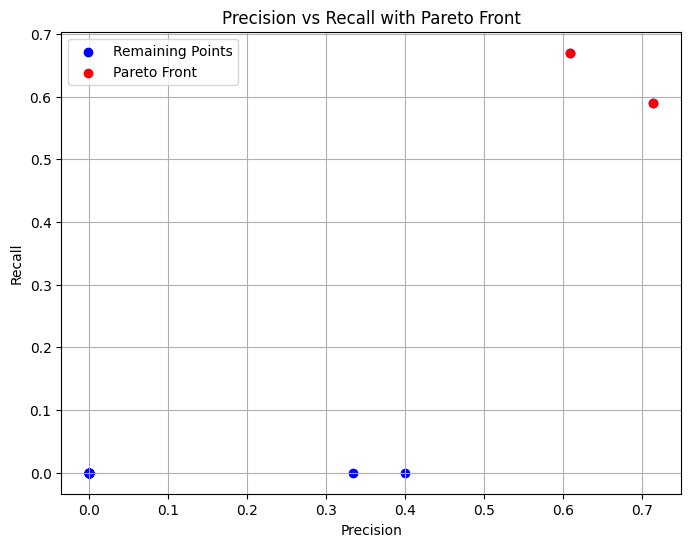

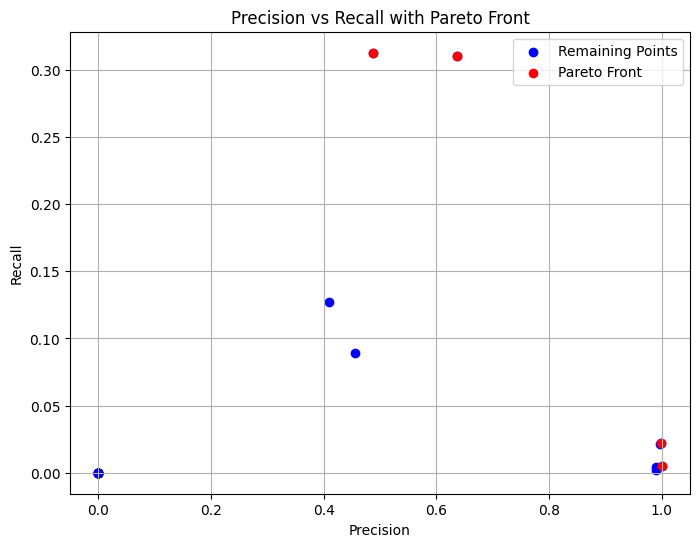

In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from paretoset import paretoset

def read_and_filter_file(file_path, attack):
    data_points = []

    # Open and read the file line by line
    with open(file_path, 'r') as file:
        for line in file:
            try:
                # Parse each line as JSON
                record = json.loads(line.strip())

                # Check if "attack" is "mixed"
                if record.get("attack") == attack:
                    # Extract precision and recall values
                    precision = record.get("precision")
                    recall = record.get("recall")
                    if precision is not None and recall is not None:
                        data_points.append({"precision": precision, "recall": recall})
            except json.JSONDecodeError as e:
                print(f"Error parsing JSON: {e} in line: {line.strip()}")

    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(data_points)

def calculate_pareto_front(data):
    # Use paretoset to calculate the Pareto front
    pareto_mask = paretoset(data, sense=["max", "max"])  # Maximize precision and recall
    pareto_front = data[pareto_mask]
    return pareto_front

def create_diagram(data, pareto_front, output_file):
    # Create a scatter plot of all points
    plt.figure(figsize=(8, 6))
    plt.scatter(data["precision"], data["recall"], color="blue", label="Remaining Points")
    
    # Highlight Pareto front points
    plt.scatter(pareto_front["precision"], pareto_front["recall"], color="red", label="Pareto Front")
    
    # Add labels, grid, and legend
    plt.title("Precision vs Recall with Pareto Front")
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.grid(True)
    plt.legend()

    # Save the diagram as an SVG file
    plt.savefig(output_file, format="svg")
    print(f"Diagram saved to {output_file}")

if __name__ == "__main__":
    # Input file containing JSON lines
    input_file = "output.json"

    attack="const_pos"
    # Read and filter data points
    data = read_and_filter_file(input_file, attack)

    # Output file for the diagram
    output_file = attack+"_diagramm.svg"
    
    # Calculate the Pareto front
    pareto_front = calculate_pareto_front(data)
        
    # Create and save the diagram
    create_diagram(data, pareto_front, output_file)

    attack="rand_speed"
    # Read and filter data points
    data = read_and_filter_file(input_file, attack)

    # Output file for the diagram
    output_file = attack+"_diagramm.svg"
    
    # Calculate the Pareto front
    pareto_front = calculate_pareto_front(data)
        
    # Create and save the diagram
    create_diagram(data, pareto_front, output_file)

    attack="sudden_stop"
    # Read and filter data points
    data = read_and_filter_file(input_file, attack)

    # Output file for the diagram
    output_file = attack+"_diagramm.svg"
    
    # Calculate the Pareto front
    pareto_front = calculate_pareto_front(data)
        
    # Create and save the diagram
    create_diagram(data, pareto_front, output_file)


    attack="mixed"
    # Read and filter data points
    data = read_and_filter_file(input_file, attack)

    # Output file for the diagram
    output_file = attack+"_diagramm.svg"
    
    # Calculate the Pareto front
    pareto_front = calculate_pareto_front(data)
        
    # Create and save the diagram
    create_diagram(data, pareto_front, output_file)



30
Pareto front written to const_pos_pareto_front.json
Diagram saved to const_pos_precision_recall_pareto.svg
Pareto front written to rand_speed_pareto_front.json
Diagram saved to rand_speed_precision_recall_pareto.svg
Pareto front written to sudden_stop_pareto_front.json
Diagram saved to sudden_stop_precision_recall_pareto.svg
Pareto front written to mixed_pareto_front.json
Diagram saved to mixed_precision_recall_pareto.svg


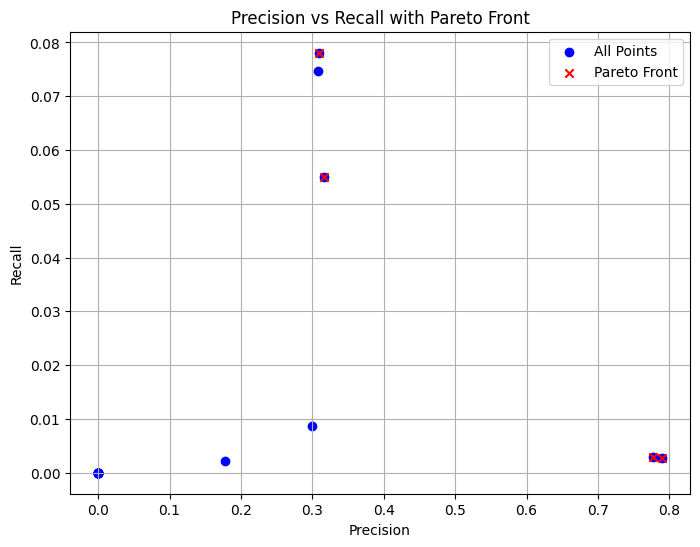

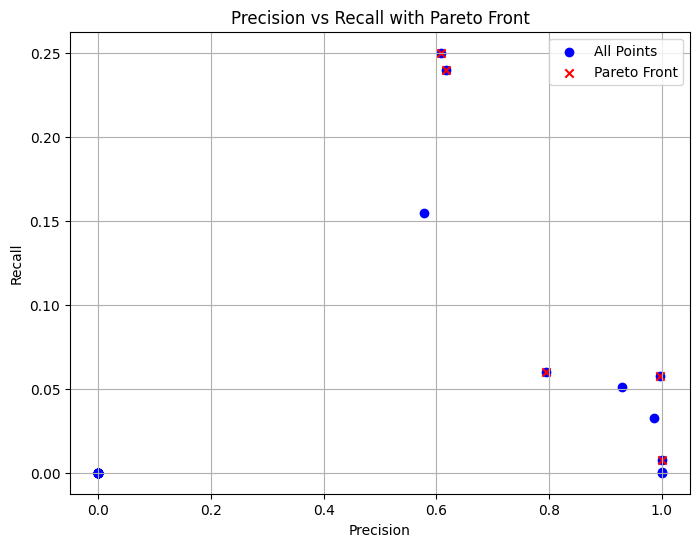

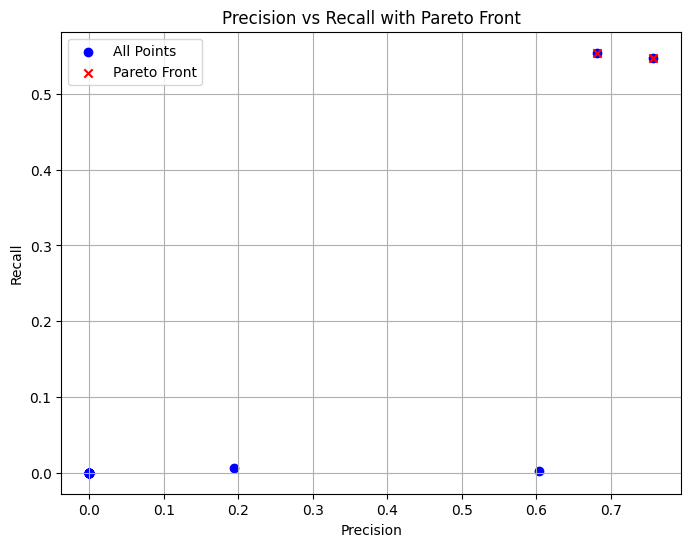

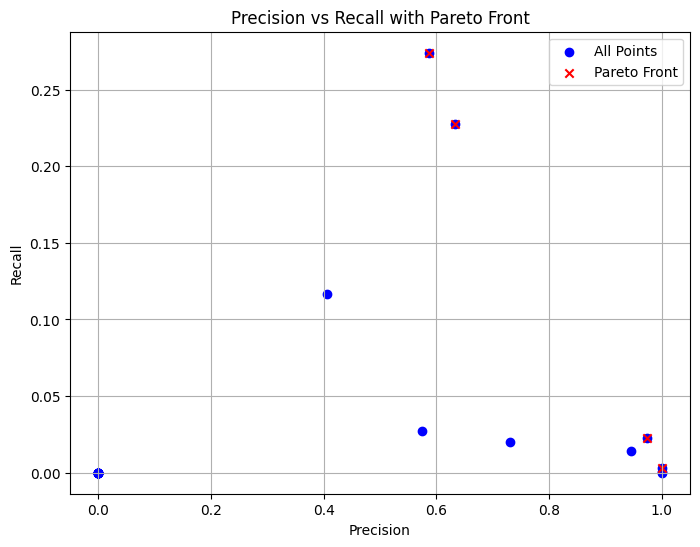

In [28]:
import json
import pandas as pd
from paretoset import paretoset

def read_and_filter_file(file_path, filter):
    data_points = []

    # Open and read the file line by line
    with open(file_path, 'r') as file:
        for line in file:
            try:
                # Parse each line as JSON
                record = json.loads(line.strip())

                # Check if "attack" is "mixed"
                if record.get("attack") == filter:
                    # Extract precision and recall values
                    precision = record.get("precision")
                    recall = record.get("recall")
                    if precision is not None and recall is not None:
                        data_points.append([precision, recall, record])
            except json.JSONDecodeError as e:
                print(f"Error parsing JSON: {e} in line: {line.strip()}")

    return data_points

def calculate_pareto_front(data_points):
    # Convert the list of data points to a DataFrame for easier handling with paretoset
    df = pd.DataFrame(data_points, columns=['precision', 'recall', 'record'])
    
    # Calculate the Pareto set (maximizing both precision and recall)
    pareto_mask = paretoset(df[['precision', 'recall']], sense=["max", "max"])
    
    # Filter the Pareto front using the mask
    pareto_front = df[pareto_mask]
    
    return pareto_front

def write_pareto_front_to_file(pareto_front, output_file):
    # Write the filtered Pareto front to an output file
    with open(output_file, 'w') as file:
        for _, row in pareto_front.iterrows():
            # Write the original JSON record for each point in the Pareto front
            json.dump(row['record'], file)
            file.write('\n')
    print(f"Pareto front written to {output_file}")


def create_diagram(data_points, pareto_front, output_file):
    # Extract precision and recall for all points
    precision_all = [point[0] for point in data_points]
    recall_all = [point[1] for point in data_points]

    # Extract precision and recall for Pareto front
    precision_pareto = [point[0] for point in pareto_front[['precision', 'recall']].values]
    recall_pareto = [point[1] for point in pareto_front[['precision', 'recall']].values]

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(precision_all, recall_all, color="blue", label="All Points")
    plt.scatter(precision_pareto, recall_pareto, color="red", label="Pareto Front", marker='x')
    plt.title("Precision vs Recall with Pareto Front")
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.grid(True)
    plt.legend()

    # Save the diagram as an SVG file
    plt.savefig(output_file, format="svg")
    print(f"Diagram saved to {output_file}")

if __name__ == "__main__":
    # Input file containing JSON lines
    input_file = "output.json"

    attack = "const_pos"

    # Read and filter data points
    points = read_and_filter_file(input_file, attack)
    
    # Output file for the Pareto front
    output_file = attack + "_pareto_front.json"

    # Output file for the diagram
    diagram_file = attack + "_precision_recall_pareto.svg"
    
    # Calculate the Pareto front
    pareto_front = calculate_pareto_front(points)
        
    # Write the Pareto front to the output file
    write_pareto_front_to_file(pareto_front, output_file)

    # Create and save the diagram
    create_diagram(points, pareto_front, diagram_file)

    attack = "rand_speed"

    # Read and filter data points
    points = read_and_filter_file(input_file, attack)
    
    # Output file for the Pareto front
    output_file = attack + "_pareto_front.json"

    # Output file for the diagram
    diagram_file = attack + "_precision_recall_pareto.svg"
    
    # Calculate the Pareto front
    pareto_front = calculate_pareto_front(points)
        
    # Write the Pareto front to the output file
    write_pareto_front_to_file(pareto_front, output_file)

    # Create and save the diagram
    create_diagram(points, pareto_front, diagram_file)

    attack = "sudden_stop"

    # Read and filter data points
    points = read_and_filter_file(input_file, attack)
    
    # Output file for the Pareto front
    output_file = attack + "_pareto_front.json"

    # Output file for the diagram
    diagram_file = attack + "_precision_recall_pareto.svg"
    
    # Calculate the Pareto front
    pareto_front = calculate_pareto_front(points)
        
    # Write the Pareto front to the output file
    write_pareto_front_to_file(pareto_front, output_file)

    # Create and save the diagram
    create_diagram(points, pareto_front, diagram_file)

    attack = "mixed"

    # Read and filter data points
    points = read_and_filter_file(input_file, attack)
    
    # Output file for the Pareto front
    output_file = attack + "_pareto_front.json"

    # Output file for the diagram
    diagram_file = attack + "_precision_recall_pareto.svg"
    
    # Calculate the Pareto front
    pareto_front = calculate_pareto_front(points)
        
    # Write the Pareto front to the output file
    write_pareto_front_to_file(pareto_front, output_file)

    # Create and save the diagram
    create_diagram(points, pareto_front, diagram_file)

